<a href="https://colab.research.google.com/github/Nndna9/task2-WineQuality/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#importing the necessary libraries
import numpy as np
import pandas as pd
#Warnings
import warnings
warnings.filterwarnings("ignore")

In [30]:
#loading the red wine quality dataset
wine = pd.read_csv("winequality-red.csv")

In [ ]:
#printing the first few rows of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#printing the last few ros of the dataset
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [31]:
#getting the information about the wine dataframe
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#getting the descriptive statistics for the wine dataframe
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#extracting the values from the column "quality"
quality = wine["quality"].values

#storing the classification labels based on the "quality" column values
classification = []

for i in quality:
    if i < 5:
        classification.append("POOR")
    elif i>=5 and i<6:
        classification.append("AVERAGE")
    else:
        classification.append("GOOD")

In [ ]:
#adding the "category" column to the dataframe
classification = pd.DataFrame(data=classification,columns=["category"])

wine = pd.concat([wine,classification],axis=1)


In [ ]:
#printing the first few rows of the wine dataframe
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,AVERAGE
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,AVERAGE
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,AVERAGE
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,GOOD
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,AVERAGE


In [ ]:
#printing the last few rows of the wine dataframe
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,AVERAGE
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,GOOD
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,GOOD
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,AVERAGE
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,GOOD


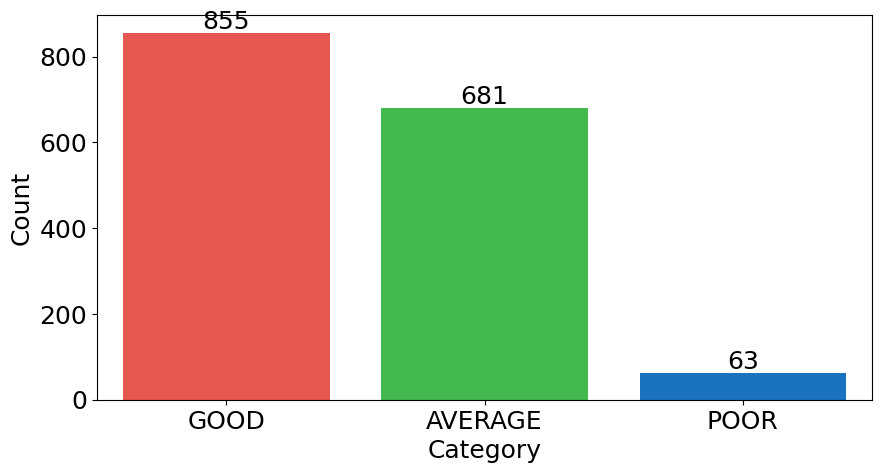

In [ ]:
#plotting a bar graph for the category values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 18})

category_counts = wine["category"].value_counts()

# Defining a custom color palette
custom_palette = ["#FF4136", "#2ECC40", "#0074D9"]

sns.barplot(x=category_counts.index, y=category_counts, palette=custom_palette)

# Adding labels to the bars
for i, count in enumerate(category_counts):
    plt.text(i, count + 10, str(count), ha='center')

# Adding labels to the x-axis and y-axis
plt.xlabel("Category")
plt.ylabel("Count")

plt.show()


In [ ]:
#getting the count of each category in the dataframe
wine["category"].value_counts()

GOOD       855
AVERAGE    681
POOR        63
Name: category, dtype: int64

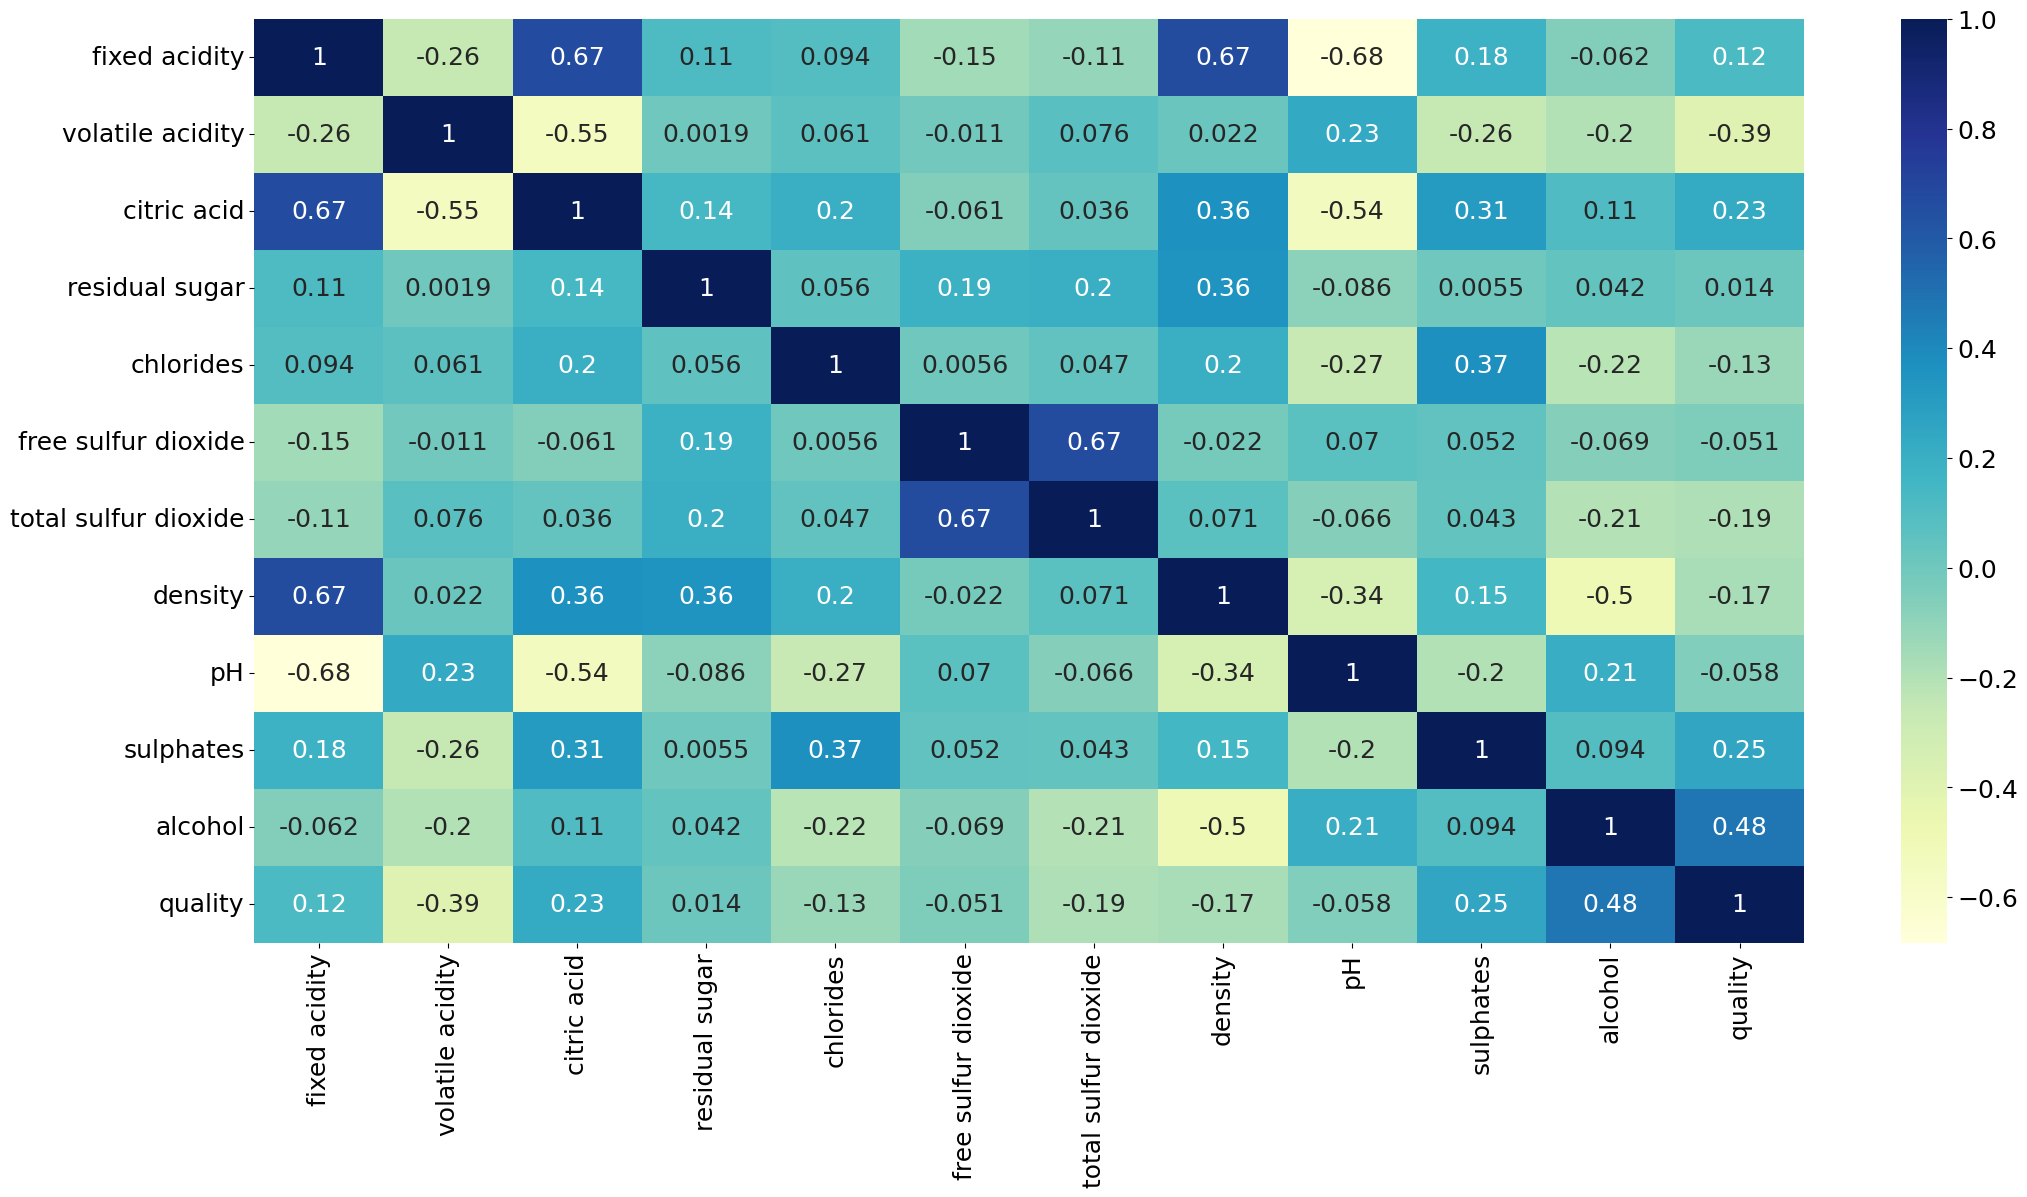

In [ ]:
#generating a heat map
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))
plt.rcParams.update({'font.size': 18})

sns.heatmap(data=wine.corr(), annot=True, cmap='YlGnBu')

plt.show()

In [ ]:
#printing the first few rows of the wine dataframe
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,AVERAGE
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,AVERAGE
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,AVERAGE
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,GOOD
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,AVERAGE


In [ ]:
#creating a duplicate dataframe for wine
wine_copy = wine

In [ ]:
#storing all the categorical values
X = wine_copy.drop(["category"], axis = 1)

In [ ]:
#storing the target variable
Y = wine_copy["category"]

In [ ]:
#encoding the categorical values in 'Y'
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

Y = lbl_enc.fit_transform(Y)

Y

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#spltting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

classification_1 = classification_report(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
accuracy_percent = round(accuracy1 * 100, 2)

print("Classification Report:")
print(classification_1)
print("\n")
print(f"Quality of Red Wine is(accuracy score): {accuracy_percent:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       208
           1       1.00      1.00      1.00       254
           2       0.83      0.56      0.67        18

    accuracy                           0.98       480
   macro avg       0.93      0.85      0.88       480
weighted avg       0.98      0.98      0.98       480



Quality of Red Wine is(accuracy score): 97.71%


In [ ]:
#SUPPORT VECTOR MACHINES
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

classification = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = round(accuracy * 100, 2)

print("Classification Report:")
print(classification)
print("\n")
print(f"Quality of Red Wine is(accuracy score): {accuracy_percent:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.36      0.47       208
           1       0.60      0.88      0.72       254
           2       0.00      0.00      0.00        18

    accuracy                           0.62       480
   macro avg       0.43      0.41      0.40       480
weighted avg       0.61      0.62      0.58       480



Quality of Red Wine is(accuracy score): 62.08%


In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

classification = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = round(accuracy * 100, 2)

print("Classification Report:")
print(classification)
print("\n")
print(f"Quality of Red Wine is(accuracy score): {accuracy_percent:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       254
           2       1.00      1.00      1.00        18

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



Quality of Red Wine is(accuracy score): 100.00%


In [ ]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

classification = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = round(accuracy * 100, 2)

print("Classification Report:")
print(classification)
print("\n")
print(f"Quality of Red Wine is(accuracy score): {accuracy_percent:.2f}%")



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       254
           2       1.00      1.00      1.00        18

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



Quality of Red Wine is(accuracy score): 100.00%


In [ ]:
# NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

y_pred = knc.predict(x_test)

classification = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = round(accuracy * 100, 2)

print("Classification Report:")
print(classification)
print("\n")
print(f"Quality of Red Wine is(accuracy score): {accuracy_percent:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       208
           1       0.74      0.73      0.73       254
           2       0.00      0.00      0.00        18

    accuracy                           0.68       480
   macro avg       0.45      0.47      0.46       480
weighted avg       0.66      0.68      0.67       480



Quality of Red Wine is(accuracy score): 68.33%


In [ ]:
#ADA BOOST

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ab = AdaBoostClassifier()
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)

classification = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = round(accuracy * 100, 2)

print("Classification Report:")
print(classification)
print("\n")
print(f"Quality of Red Wine is(accuracy score): {accuracy_percent:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       254
           2       1.00      1.00      1.00        18

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



Quality of Red Wine is(accuracy score): 100.00%


In [ ]:
#the end!